# Обучение без учителя в Scikit-learn
## Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'jpeg'

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.

In [85]:
from sklearn.datasets import load_boston
boston = load_boston()
x = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [86]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Масштабируйте данные с помощью StandardScaler.

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled,columns=boston.feature_names)

Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.

In [88]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
x_train_tsne = tsne.fit_transform(x_train_scaled)
x_train_tsne.shape

(404, 2)

Постройте диаграмму рассеяния на этих данных.

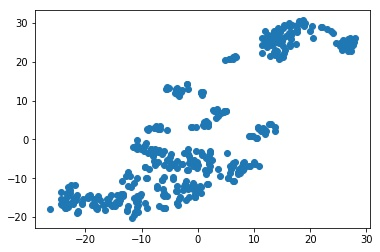

In [89]:
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1])
plt.show()

## Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [90]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(x_train_scaled)
pd.value_counts(labels_train)

2    191
1    127
0     86
dtype: int64

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

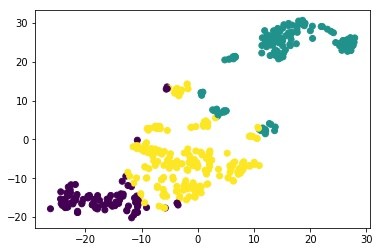

In [91]:
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], c=labels_train)
plt.show()

Вычислите средние значения price и CRIM в разных кластерах.

In [92]:
x_train_scaled['Class'] = labels_train
x_train_scaled['Price'] = y_train
x_train_scaled.groupby('Class').mean()[['Price', 'CRIM']]

,Price,CRIM
Class,,
0,27.788372,-0.398864
1,16.165354,0.810904
2,24.958115,-0.359594


## Задание 3
Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора. Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [93]:
x_test_scaled = scaler.transform(x_test)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=boston.feature_names)
labels_test = kmeans.predict(x_test_scaled)
x_test_scaled['Class'] = labels_test
x_test_scaled['Price'] = y_test
x_test_scaled.groupby('Class').mean()[['Price', 'CRIM']]

,Price,CRIM
Class,,
0,31.350000,-0.400162
1,16.437143,0.739661
2,21.860784,-0.377146
